In [56]:
%%HTML
<style type='text/css'>
    *{
        # background-color:#E3EDCD;
        # background-color:black;
        # color:white;
        
    }
    h1{
        color:#1976d2;
    }
    h2{
        color:#f57c00;
    }
    h3{
        color:#ba37ff;
    }
    h4{
        color:green;
    }
    table{
        border:1px solid black !important;
        border-collapse:collapse !important;
    }
    th{
        background-color:blueviolet !important;
        text-align:center;
        color:white;
    }
    th,td{
        border:0.1px solid black !important;
        transition:0.2s all liner;
        
    }
    td:hover{
        transform:scale(1.1);
        background-color:orange;
        color:blueviolet;
    }
    .raw{
        white-space:pre;
    }
    .atcenter{
        text-align:center !important;
    }
    .imp{
        color:red;
        font-weight:bolder;
    }
</style>

# 4.1 Matplotlib常用技巧

### 4.1.1 导入Matplotlib

就像之前用 np 作为 NumPy 的简写形式、pd 作为 Pandas 的简写形式一样，我们也可以在导入 Matplotlib 时用一些它常用的简写形式：

In [1]:
import matplotlib.pyplot as plt
import numpy as np

### 4.1.2设置绘图样式

我们将使用 plt.style 来选择图形的绘图风格。现在选择经典
（classic）风格，这样画出的图就都是经典的 Matplotlib 风格了：

In [3]:
plt.style.use('classic')

在后面的内容中，我们将根据需要调整绘图风格。Matplotlib 在 1.5 版
之后开始支持不同的风格列表（stylesheets）。如果你用的 Matplotlib 版
本较旧，那么就只能使用默认的绘图风格。关于风格列表的更多信息，
请参见 4.13 节。

### 4.1.3 用不用show()？如何显示图形

如果数据可视化图不能被看见，那就一点儿用也没有了。但如何显示你
的图形，就取决于具体的开发环境了。Matplotlib 的最佳实践与你使用
的开发环境有关。简单来说，就是有三种开发环境，分别是脚本、
IPython shell 和 IPython Notebook。

#### 01. 在脚本中画图

如果你在一个脚本文件中使用 Matplotlib，那么显示图形的时候必
须使用 plt.show()。plt.show() 会启动一个事件循环（event
loop），并找到所有当前可用的图形对象，然后打开一个或多个交
互式窗口显示图形。

例如，你现在有一个名为 myplot.py 的文件，代码如下所示：

```python
import matplotlib.pyplot as plt
import numpy as np
x = np.linespace(0,10,100)
plt.plot(x,np.sin(x))
plt.plot(x,np.cos(x))
plt.show()
```

你可以从命令行工具中执行这个脚本，然后会看到一个新窗口，里
面会显示你的图形：

```command
$ python myplot.py
```

plt.show() 这行代码在后面完成了许多事情，它需要与你使用的
操作系统的图形显示接口进行交互。虽然具体的操作细节会因操作
系统和安装过程不同而有很大的差异，但是 Matplotlib 为你隐藏了
所有的细节，非常省心。

不过有一点需要注意，一个 Python 会话（session）中只能使用一
次 plt.show()，因此通常都把它放在脚本的最后。多个
plt.show() 命令会导致难以预料的显示异常，应该尽量避免。

#### 02. 在IPython shell中画图

在 IPython shell 中交互式地使用 Matplotlib 画图非常方便（详情请
参见第 1 章），在 IPython 启动 Matplotlib 模式就可以使用它。为
了启用这个模式，你需要在启动 ipython 后使用 %matplotlib 魔
法命令：


``` ipython
In[1]: %matplotlib
Using matplotlib backend: TkAgg

In[2]: import matplotlib.pyplot as plt
```

此后的任何 plt 命令都会自动打开一个图形窗口，增加新的命令，
图形就会更新。有一些变化（例如改变已经画好的线条属性）不会
自动及时更新；对于这些变化，可以使用 plt.draw() 强制更新。
在 IPython shell 中启动 Matplotlib 模式之后，就不需要使用
plt.show() 了。

#### 03. 在IPython Notebook中画图

IPython Notebook 是一款基于浏览器的交互式数据分析工具，可以
将描述性文字、代码、图形、HTML 元素以及更多的媒体形式组合
起来，集成到单个可执行的 Notebook 文档中（详情请参见第 1
章）。<br>
用 IPython Notebook 进行交互式画图与使用 IPython shell 类似，也
需要使用 %matplotlib 命令。你可以将图形直接嵌在 IPython
Notebook 页面中，有两种展现形式。

- %matplotlib notebook 会在 Notebook 中启动交互式图形。
- %matplotlib inline 会在 Notebook 中启动静态图形。

本书统一使用 %matplotbib inline：


``` ipython
In[3]: %matplotlib inline
```

运行命令之后（每一个 Notebook 核心任务 / 会话只需要运行一
次），在每一个 Notebook 的单元中创建图形就会直接将 PNG 格式
图形文件嵌入在单元中（如图 4-1 所示）：

In [5]:
%matplotlib inline

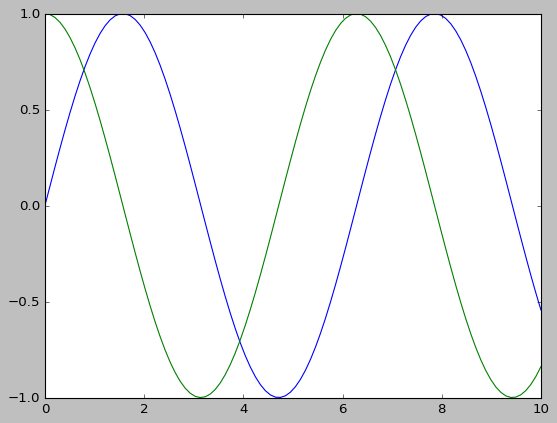

In [7]:
import numpy as np
x = np.linspace(0,10,100)
fig = plt.figure()
plt.plot(x,np.sin(x))
plt.plot(x,np.cos(x))

<p style='text-align:center'> 图 4-1：基本图形示例</p>

#### 4.1.4 将图形保存为文件

Matplotlib 的一个优点是能够将图形保存为各种不同的数据格式。你可
以用 savefig() 命令将图形保存为文件。例如，如果要将图形保存为
PNG 格式，你可以运行这行代码：

```ipython
In[5]: fig.savefig('文件路径/demofig.png')
```

In [8]:
fig.savefig('../imgs/demofig.png')

这样工作文件夹里就有了一个图像生成的图片

为了确定文件中是否保存有我们需要的内容，可以用 IPython 的 Image
对象来显示文件内容（如图 4-2 所示）：

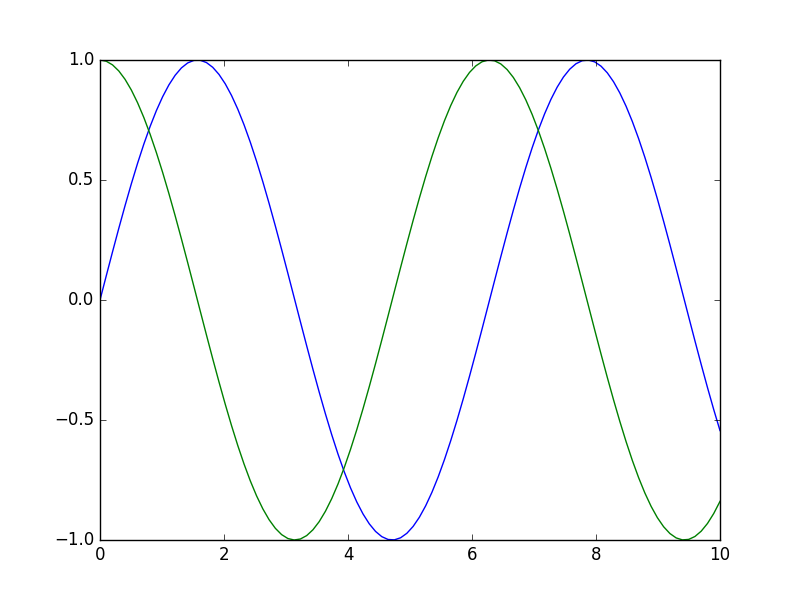

In [9]:
from IPython.display import Image
Image('../imgs/demofig.png')

<p class='atcenter'>图 4-2：渲染 PNG 基本图形</p>

在 savefig() 里面，保存的图片文件格式就是文件的扩展名。
Matplotlib 支持许多图形格式，具体格式由操作系统已安装的图形显示
接口决定。你可以通过 canvas 对象的方法查看系统支持的文件格式：

```ipython
In[8]: fig.canvas.get_supported_filetypes()
Out[8]: {'eps': 'Encapsulated Postscript',
'jpeg': 'Joint Photographic Experts Group',
'jpg': 'Joint Photographic Experts Group',
'pdf': 'Portable Document Format',
'pgf': 'PGF code for LaTeX',
'png': 'Portable Network Graphics',
'ps': 'Postscript',
'raw': 'Raw RGBA bitmap',
'rgba': 'Raw RGBA bitmap',
'svg': 'Scalable Vector Graphics',
'svgz': 'Scalable Vector Graphics',
'tif': 'Tagged Image File Format',
'tiff': 'Tagged Image File Format'}

```

需要注意的是，当你保存图形文件时，不需要使用 plt.show() 或者前
面介绍过的命令。

# 4.2 两种画图接口

不过 Matplotlib 有一个容易让人混淆的特性，就是它的两种画图接口：
一个是便捷的 MATLAB 风格接口，另一个是功能更强大的面向对象接
口。下面来快速对比一下两种接口的主要差异。

### 4.2.1 MATLAB风格接口

Matplotlib 最初作为 MATLAB 用户的 Python 替代品，许多语法都和
MATLAB 类似。 MATLAB 风格的工具位于 pyplot（plt）接口中。
MATLAB 用户肯定对下面的代码特别熟悉（如图 4-3 所示）：

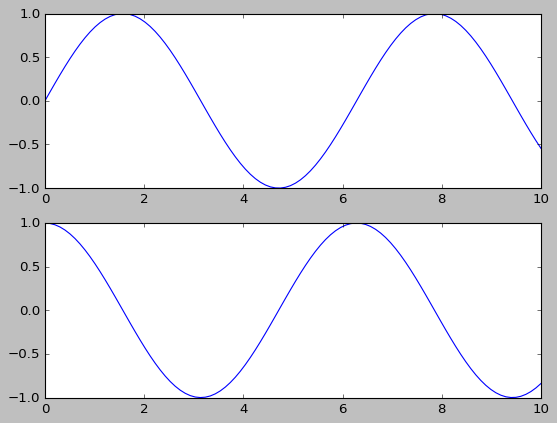

In [13]:
plt.figure() # 创建图形
# 创建两个子图中的第一个，设置坐标轴
plt.subplot(2, 1, 1) # (行、列、子图编号)
plt.plot(x, np.sin(x))
# 创建两个子图中的第二个，设置坐标轴
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x));

<p class='atcenter'>图 4-3：MATLAB 风格接口绘制的子图</p>

这种接口最重要的特性是有状态的（stateful）：它会持续跟踪“当前
的”图形和坐标轴，所有 plt 命令都可以应用。你可以用 plt.gcf()
（获取当前图形）和 plt.gca()（获取当前坐标轴）来查看具体信息。<br>
虽然这个有状态的接口画起图来又快又方便，但是也很容易出问题。例
如，当创建上面的第二个子图时，怎么才能回到第一个子图，并增加新
内容呢？虽然用 MATLAB 风格接口也能实现，但未免过于复杂，好在
还有一种更好的办法！


### 4.2.2 面向对象接口

面向对象接口可以适应更复杂的场景，更好地控制你自己的图形。在面
向对象接口中，画图函数不再受到当前“活动”图形或坐标轴的限制，而
变成了显式的 Figure 和 Axes 的方法。通过下面的代码，可以用面向
对象接口重新创建之前的图形（如图 4-4 所示）：

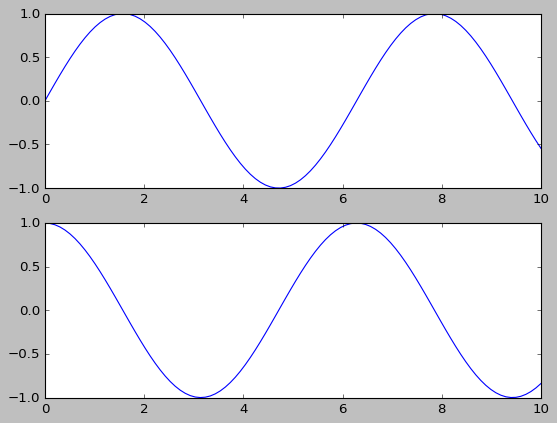

In [15]:
# 先创建图形网格
# ax是一个包含两个Axes对象的数组
fig, ax = plt.subplots(2)
# 在每个对象上调用plot()方法
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x));

<p class='atcenter'>图 4-4：用面向对象接口创建子图</p>

虽然在画简单图形时，选择哪种绘图风格主要看个人喜好，但是在画比
较复杂的图形时，面向对象方法会更方便。在本章中，我们将在
MATLAB 风格接口与面向对象接口间来回转换，具体内容根据实际情
况而定。在绝大多数场景中，plt.plot() 与 ax.plot() 的差异非常
小，但是后文会重点指出其中的一些陷阱。

# 4.3 简易线形图

在所有图形中，最简单的应该就是线性方程 y = f (x) 的可视化了。来看
看如何创建这个简单的线形图。接下来的内容都是在 Notebook 中画
图，因此需要导入以下命令：

In [18]:
import numpy as np
import matplotlib.pyplot as plt

要画 Matplotlib 图形时，都需要先创建一个图形 fig 和一个坐标轴
ax。创建图形与坐标轴的最简单做法如下所示（如图 4-5 所示）：

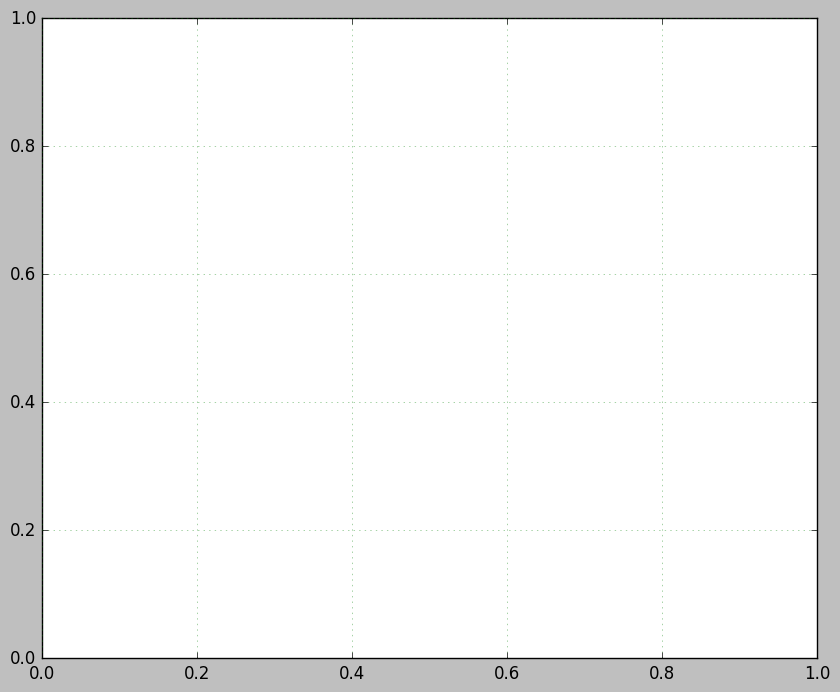

In [21]:
plt.figure(figsize=(10,8),dpi=100)
plt.grid(True,color='g',alpha=0.5)
plt.show()

<p class='atcenter'>图 4-5：一个空的网格坐标轴 </p>

在 Matplotlib 里面，figure（plt.Figure 类的一个实例）可以被看成是
一个能够容纳各种坐标轴、图形、文字和标签的容器。就像你在图中看
到的那样，axes（plt.Axes 类的一个实例）是一个带有刻度和标签的
矩形，最终会包含所有可视化的图形元素。在本书中，我们通常会用变
量 fig 表示一个图形实例，用变量 ax 表示一个坐标轴实例或一组坐标
轴实例。


创建好坐标轴之后，就可以用 ax.plot 画图了。从一组简单的正弦曲
线（sinusoid）开始（如图 4-6 所示）：


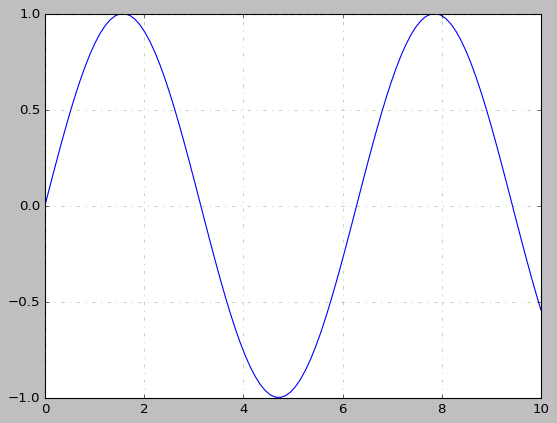

In [22]:
plt.figure()
plt.grid(True,color='g',linestyle='-.',alpha=0.5)
x=np.linspace(0,10,100)
plt.plot(x,np.sin(x))
plt.show()

<p class='atcenter'>图 4-6：简单的正弦曲线图</p>

另外也可以用 pylab 接口画图，这时图形与坐标轴都在底层执行（如图
4-7 所示，4.2 节详细讨论了这两种接口）：

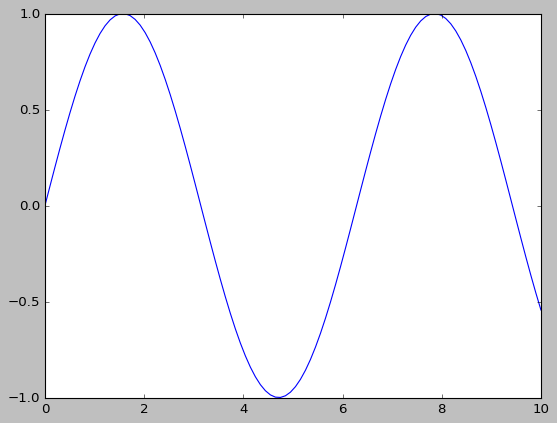

In [23]:
plt.plot(x,np.sin(x))

<p class='atcenter'>图 4-7：用面向对象接口画正弦曲线</p>

如果想在一张图中创建多条线，可以重复调用 plot 命令（如图 4-8 所
示）：

In [3]:
x = np.linspace(0,10,100)


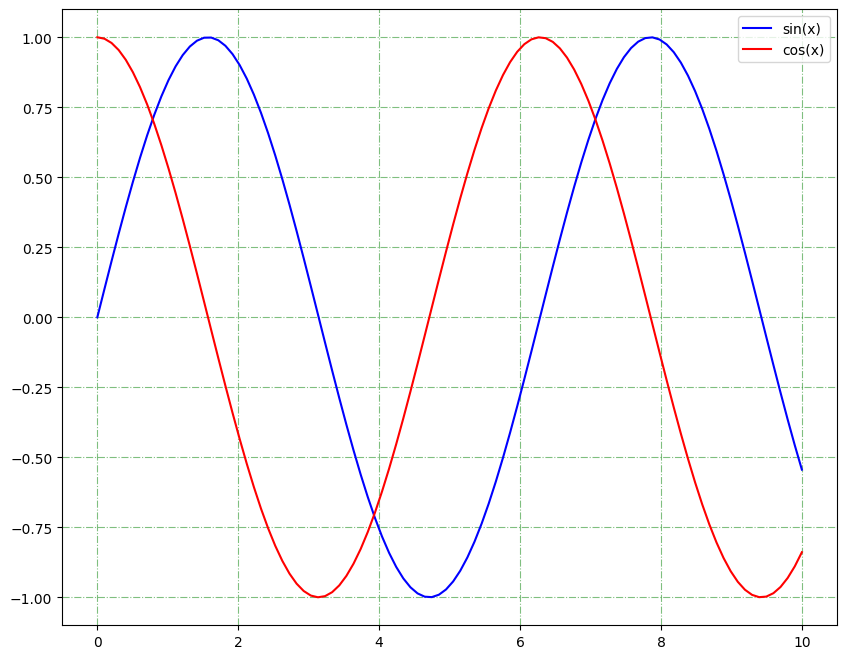

In [8]:
plt.figure(figsize=(10,8))
plt.grid(True,alpha=0.5,color='g',linestyle='-.')
plt.plot(x,np.sin(x),color='b',label='sin(x)')
plt.plot(x,np.cos(x),color='r',label='cos(x)')
plt.legend(loc='best')
plt.show()

<p class='atcenter'>图 4-8：创建多条线</p>

在 Matplotlib 中画简单的函数就是如此简单！下面将介绍更多关于如何
控制坐标轴和线条外观的具体配置方法

### 4.3.1 调整图形：线条的颜色与风格

通常对图形的第一次调整是调整它线条的颜色与风格。plt.plot() 函
数可以通过相应的参数设置颜色与风格。要修改颜色，就可以使用
color 参数，它支持各种颜色值的字符串。颜色的不同表示方法如下所
示（如图 4-9 所示）：

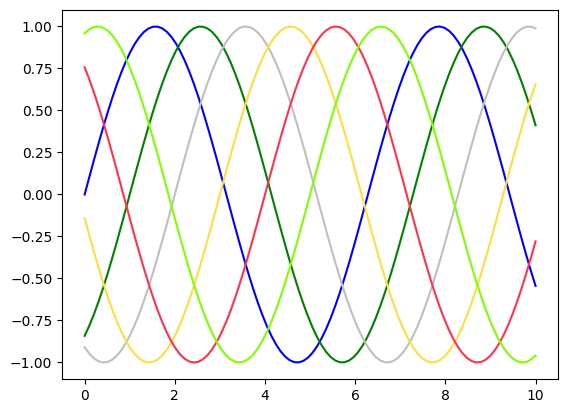

In [9]:
plt.plot(x, np.sin(x - 0), color='blue') # 标准颜色名称
plt.plot(x, np.sin(x - 1), color='g') # 缩写颜色代码（rgbcmyk）
plt.plot(x, np.sin(x - 2), color='0.75') # 范围在0~1的灰度值
plt.plot(x, np.sin(x - 3), color='#FFDD44') # 十六进制（RRGGBB，00~FF）
plt.plot(x, np.sin(x - 4), color=(1.0,0.2,0.3)) # RGB元组，范围在0~1
plt.plot(x, np.sin(x - 5), color='chartreuse'); # HTML颜色名称

<p class='atcenter'>图 4-9：控制图形元素的颜色</p>

如果不指定颜色，Matplotlib 就会为多条线自动循环使用一组默认的颜
色。<br>
与之类似，你也可以用 linestyle 调整线条的风格（如图 4-10 所
示）：


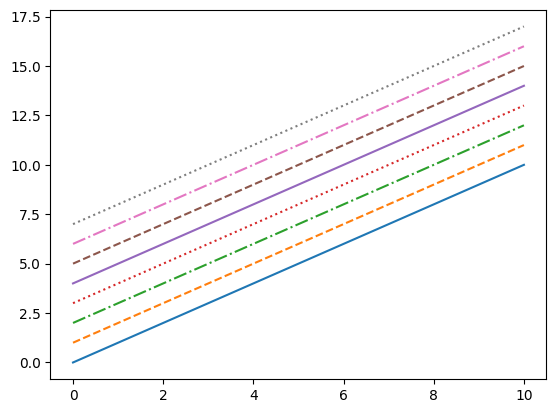

In [10]:
plt.plot(x, x + 0, linestyle='solid')
plt.plot(x, x + 1, linestyle='dashed')
plt.plot(x, x + 2, linestyle='dashdot')
plt.plot(x, x + 3, linestyle='dotted');
# 你可以用下面的简写形式
plt.plot(x, x + 4, linestyle='-') # 实线
plt.plot(x, x + 5, linestyle='--') # 虚线
plt.plot(x, x + 6, linestyle='-.') # 点划线
plt.plot(x, x + 7, linestyle=':'); # 实点线

<p class='atcenter'>图 4-10：不同风格的线条</p>

如果你想用一种更简洁的方式，则可以将 linestyle 和 color 编码组
合起来，作为 plt.plot() 函数的一个非关键字参数使用（如图 4-11
所示）：


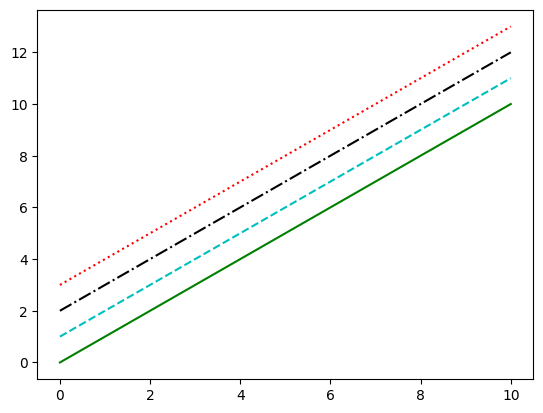

In [12]:
plt.plot(x, x + 0, '-g') # 绿色实线
plt.plot(x, x + 1, '--c') # 青色虚线
plt.plot(x, x + 2, '-.k') # 黑色点划线
plt.plot(x, x + 3, ':r'); # 红色实点线

<p class='atcenter'>图 4-11：用快捷方式设置颜色和风格</p>

这些单字符颜色代码是 RGB（Red/Green/Blue）与CMYK（Cyan/Magenta/Yellow/blacK）颜色系统中的标准缩写形式，通常用于数字化彩色图形。<br>
还有很多其他用来调整图像的关键字参数。若想了解更多的细节，建议
你用 IPython 的帮助工具查看 plt.plot() 函数的程序文档（详情请参
见 1.2 节）

### 4.3.2 调整图形：坐标轴上下限

虽然 Matplotlib 会自动为你的图形选择最合适的坐标轴上下限，但是有
时自定义坐标轴上下限可能会更好。调整坐标轴上下限最基础的方法是
plt.xlim() 和 plt.ylim()（如图 4-12 所示）：

(-1.5, 1.5)

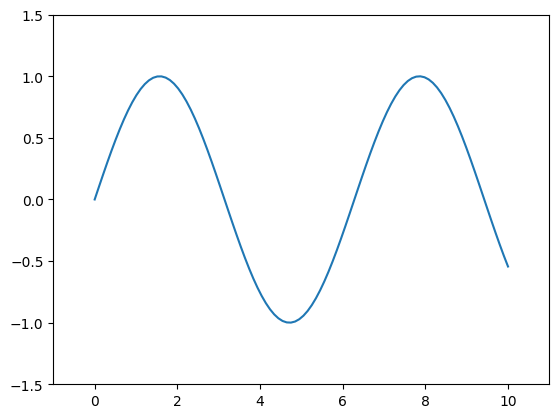

In [13]:
plt.plot(x,np.sin(x))
plt.xlim(-1,11)
plt.ylim(-1.5,1.5)

<p class='atcenter'>图 4-12：坐标轴上下限</p>

如果你想要让坐标轴逆序显示，那么也可以逆序设置坐标轴刻度值（如
图 4-13 所示）：

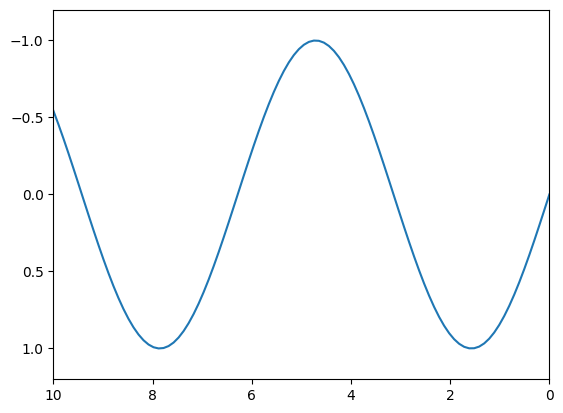

In [14]:
plt.plot(x, np.sin(x))
plt.xlim(10, 0)
plt.ylim(1.2, -1.2);

<p class='atcenter'>图 4-13：坐标轴刻度值逆序</p>

还有一个方法是 plt.axis()（注意不要搞混 axes 和 axis）。通过传入
[xmin, xmax, ymin, ymax] 对应的值，plt.axis() 方法可以让你用
一行代码设置 x 和 y 的限值（如图 4-14 所示）：

(np.float64(-1.0), np.float64(11.0), np.float64(-1.5), np.float64(1.5))

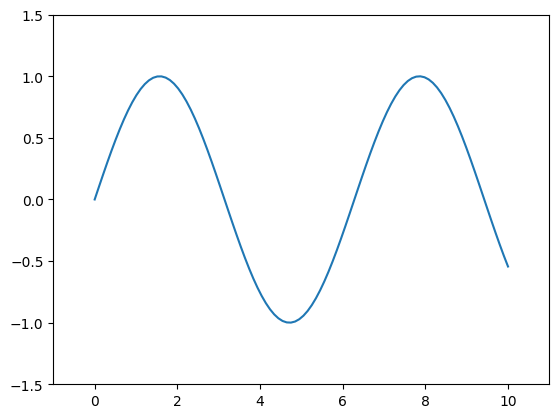

In [15]:
plt.plot(x,np.sin(x))
plt.axis([-1,11,-1.5,1.5])

<p class='atcenter'>图 4-14：用 plt.axis 设置坐标轴上下限</p>

plt.axis() 能做的可不止如此，它还可以按照图形的内容自动收紧坐
标轴，不留空白区域（如图 4-15 所示）：

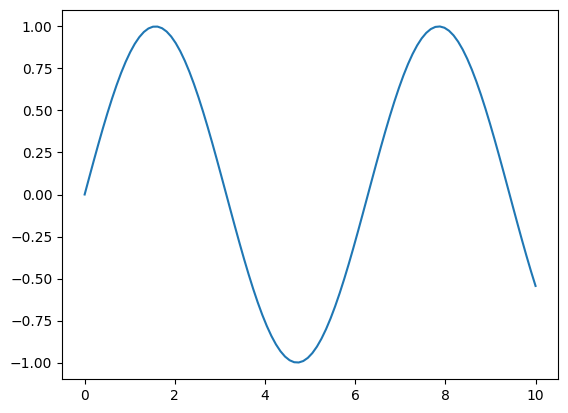

In [16]:
plt.plot(x, np.sin(x))
plt.axis('tight');

<p class='atcenter'>图 4-15：
“收紧”布局示例</p>

你还可以实现更高级的配置，例如让屏幕上显示的图形分辨率为 1:1，x
轴单位长度与 y 轴单位长度相等（图 4-16 所示）：

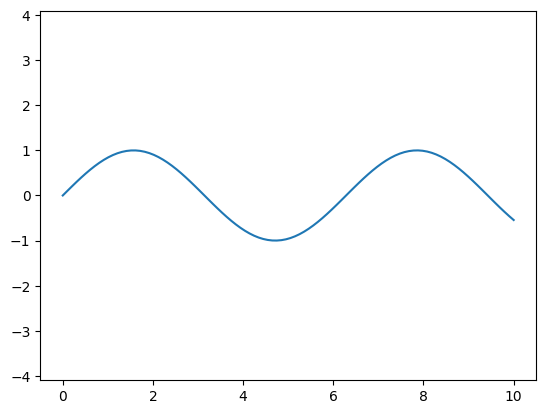

In [19]:
plt.plot(x,np.sin(x))
plt.axis('equal');

<p class='atcenter'>图 4-16：
“相等”布局示例，分辨率为 1:1
</p>

关于 plt.axis() 方法设置坐标轴上下限和其他更多功能，请参考
plt.axis() 的程序文档。

### 4.3.3 设置图形标签

本节的最后一部分将简要介绍设置图形标签的方法：图形标题、坐标轴
标题、简易图例。<br>
图形标题与坐标轴标题是最简单的标签，快速设置方法如下所示（如图
4-17 所示）：


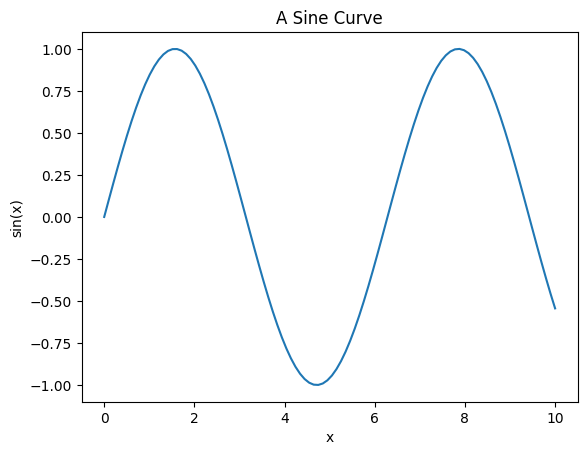

In [20]:
plt.plot(x, np.sin(x))
plt.title("A Sine Curve")
plt.xlabel("x")
plt.ylabel("sin(x)");

<p class='atcenter'>图 4-17：图形标题与坐标轴标题</p>

<p>你可以通过优化参数来调整这些标签的位置、大小和风格。若想获取更
多的信息，请参考 Matplotlib 文档和对应函数的程序文档。
在单个坐标轴上显示多条线时，创建图例显示每条线是很有效的方法。
Matplotlib 内置了一个简单快速的方法，可以用来创建图例，那就是
（估计你也猜到了）plt.legend()。虽然有不少用来设置图例的办
法，但我觉得还是在 plt.plot 函数中用 label 参数为每条线设置一个
标签最简单（如图 4-18 所示）：</p>

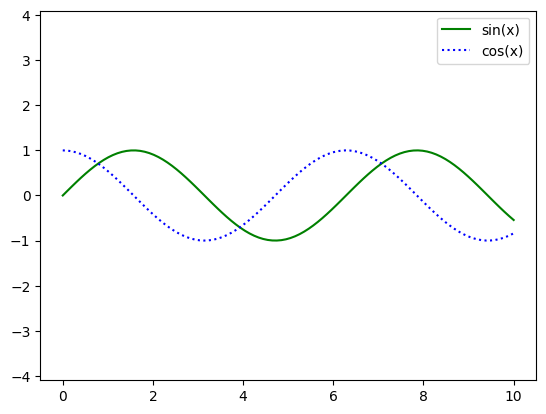

In [21]:
plt.plot(x, np.sin(x), '-g', label='sin(x)')
plt.plot(x, np.cos(x), ':b', label='cos(x)')
plt.axis('equal')
plt.legend()

<p class='atcenter'>图 4-18：图例
</p>

你会发现，plt.legend() 函数会将每条线的标签与其风格、颜色自动
匹配。关于通过 plt.legend() 设置图例的更多信息，请参考相应的程
序文档。另外，我们将在 4.8 节介绍更多高级的图例设置方法。

<p style='font-weight:bolder;color:red;text-align:center'>Matplotlib 陷阱</p>


虽然绝大多数的 plt 函数都可以直接转换成 ax 方法（例如
plt.plot() → ax.plot()、plt.legend() → ax.legend()
等），但是并非所有的命令都可以这样用。尤其是用来设置坐标轴
上下限、坐标轴标题和图形标题的函数，它们大都稍有差别。一些
MATLAB 风格的方法和面向对象方法的转换如下所示：<br>
- plt.xlabel() → ax.set_xlabel()
- plt.ylabel() → ax.set_ylabel()
- plt.xlim() → ax.set_xlim()
- plt.ylim() → ax.set_ylim()
- plt.title() → ax.set_title()

在用面向对象接口画图时，不需要单独调用这些函数，通常采用
ax.set() 方法一次性设置所有的属性是更简便的方法（如图4-19
所示）：

[(0.0, 10.0),
 (-2.0, 2.0),
 Text(0.5, 0, 'x'),
 Text(0, 0.5, 'sin(x)'),
 Text(0.5, 1.0, 'A Simple Plot')]

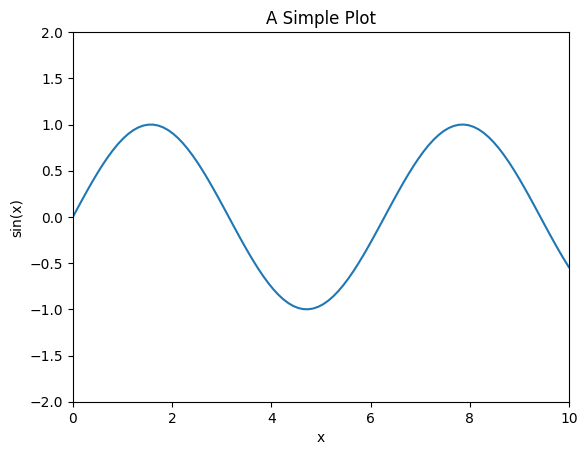

In [22]:
ax = plt.axes()
ax.plot(x,np.sin(x))
ax.set(xlim=(0,10),ylim=(-2,2),
      xlabel='x',
      ylabel='sin(x)',
      title='A Simple Plot')

<p class='atcenter'>图 4-19：用 ax.set() 方法一次性设置所有的属性</p>

# 4.4 简易散点图

另一种常用的图形是简易散点图（scatter plot），与线形图类似。这种
图形不再由线段连接，而是由独立的点、圆圈或其他形状构成。开始的
时候同样需要在 Notebook 中导入函数：

``` python
In[1]: %matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
```

### 4.4.1 用plt.plot画散点图

上一节介绍了用 plt.plot/ax.plot 画线形图的方法，现在用这些函数
来画散点图（如图 4-20 所示）：

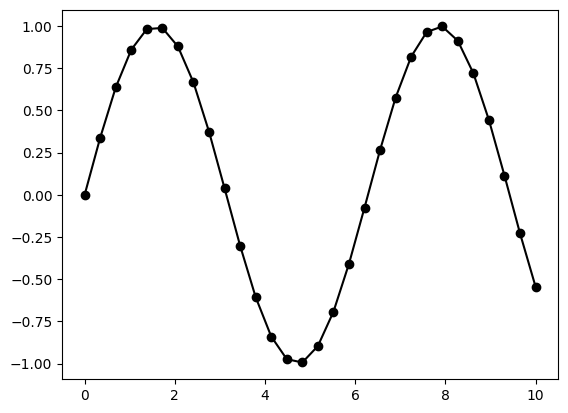

In [27]:
x = np.linspace(0,10,30)
y = np.sin(x)
plt.plot(x,y,marker='o',color='black')

<p class='atcenter'>图 4-20：散点图</p>

函数的第三个参数是一个字符，表示图形符号的类型。与你之前用 '-'
和 '--' 设置线条属性类似，对应的图形标记也有缩写形式。所有的缩
写形式都可以在 plt.plot 文档中查到，也可以参考 Matplotlib 的在线
文档。绝大部分图形标记都非常直观，我们在这里演示一部分（如图 4-
21 所示）：

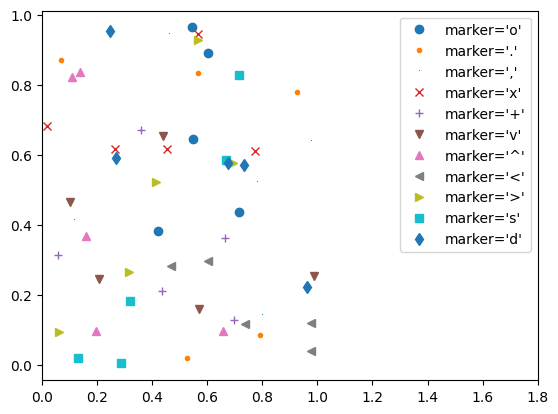

In [26]:
rng = np.random.RandomState(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.rand(5), rng.rand(5), marker,
    label="marker='{0}'".format(marker))
    plt.legend(numpoints=1)
    plt.xlim(0, 1.8);

<p class='atcenter'>图 4-21：不同的图形标记</p>

这些代码还可以与线条、颜色代码组合起来，画出一条连接散点的线
（如图 4-22 所示）：

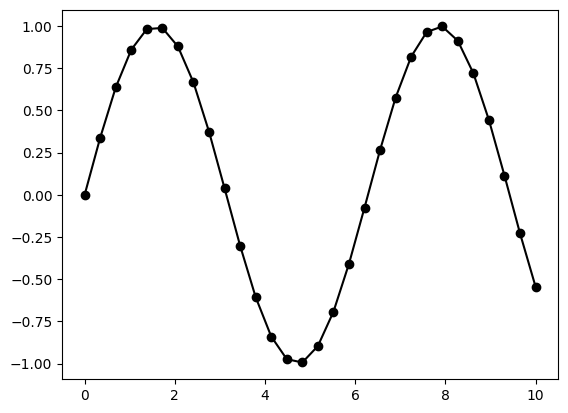

In [29]:
plt.plot(x,y,'-ok') # 直线（-）、圆圈（o）、黑色（k）

<p class='atcenter'>图 4-22：组合线条与散点</p>

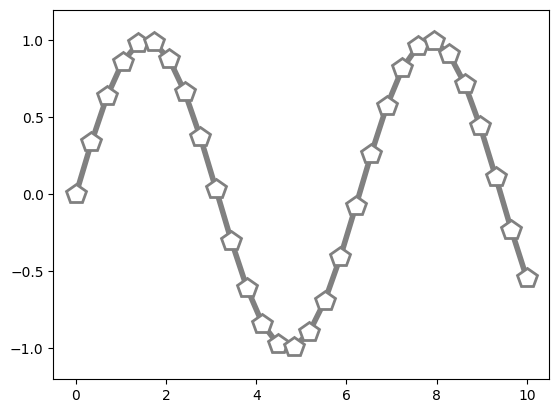

In [31]:
plt.plot(x, y, '-p', color='gray',
markersize=15, linewidth=4,
markerfacecolor='white', #marker的颜色
markeredgecolor='gray', #marker边缘的颜色
markeredgewidth=2) #marker边缘的宽度
plt.ylim(-1.2, 1.2);

<p class='atcenter'>图 4-23：自定义线条和散点属性</p>

plt.plot 函数非常灵活，可以满足各种不同的可视化配置需求。关于
具体配置的完整描述，请参考 plt.plot 文档

### 4.4.2 用plt.scatter画散点图

另一个可以创建散点图的函数是 plt.scatter。它的功能非常强大，
其用法与 plt.plot 函数类似（如图 4-24 所示）：

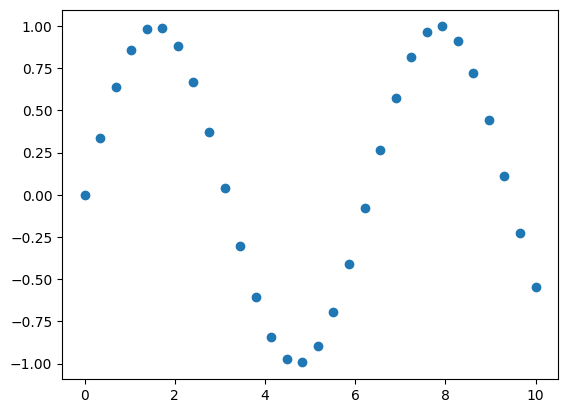

In [32]:
plt.scatter(x,y,marker='o')

<p class='atcenter'>图 4-24：简易散点图</p>

plt.scatter 与 plt.plot 的主要差别在于，前者在创建散点图时具有
更高的灵活性，可以单独控制每个散点与数据匹配，也可以让每个散点
具有不同的属性（大小、表面颜色、边框颜色等）。<br>
下面来创建一个随机散点图，里面有各种颜色和大小的散点。为了能更
好地显示重叠部分，用 alpha 参数来调整透明度（如图 4-25 所示）：

In [34]:
plt.scatter?

Signature:
plt.scatter(
    x: 'float | ArrayLike',
    y: 'float | ArrayLike',
    s: 'float | ArrayLike | None' = None,
    c: 'ArrayLike | Sequence[ColorType] | ColorType | None' = None,
    marker: 'MarkerType | None' = None,
    cmap: 'str | Colormap | None' = None,
    norm: 'str | Normalize | None' = None,
    vmin: 'float | None' = None,
    vmax: 'float | None' = None,
    alpha: 'float | None' = None,
    linewidths: 'float | Sequence[float] | None' = None,
    *,
    edgecolors: "Literal['face', 'none'] | ColorType | Sequence[ColorType] | None" = None,
    plotnonfinite: 'bool' = False,
    data=None,
    **kwargs,
) -> 'PathCollection'
Docstring:
A scatter plot of *y* vs. *x* with varying marker size and/or color.

Parameters
----------
x, y : float or array-like, shape (n, )
    The data positions.

s : float or array-like, shape (n, ), optional
    The marker size in points**2 (typographic points are 1/72 in.).
    Default is ``rcParams['lines.markersize'] ** 2``.

    Th

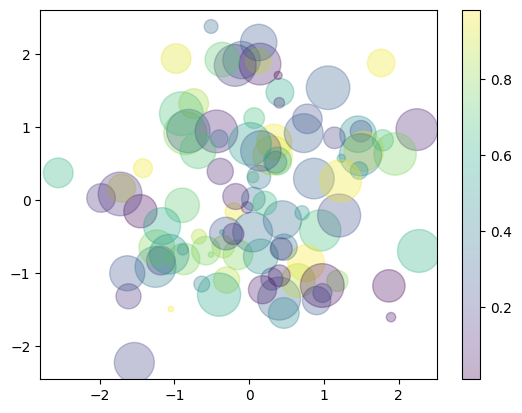

In [33]:
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)
plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
cmap='viridis')
plt.colorbar(); # 显示颜色条

<p class='atcenter'>图 4-25：改变散点图中散点的大小、颜色和透明度</p>

请注意，颜色自动映射成颜色条（color scale，通过 colorbar() 显
示），散点的大小以像素为单位。这样，散点的颜色与大小就可以在可
视化图中显示多维数据的信息了。<br>
例如，可以用 Scikit-Learn 程序库里面的鸢尾花（iris）数据来演示。它
里面有三种鸢尾花，每个样本是一种花，其花瓣（petal）与花萼
（sepal）的长度与宽度都经过了仔细测量（如图 4-26 所示）：

例如，可以用 Scikit-Learn 程序库里面的鸢尾花（iris）数据来演示。它
里面有三种鸢尾花，每个样本是一种花，其花瓣（petal）与花萼
（sepal）的长度与宽度都经过了仔细测量（如图 4-26 所示）：

In [37]:
from sklearn.datasets import load_iris

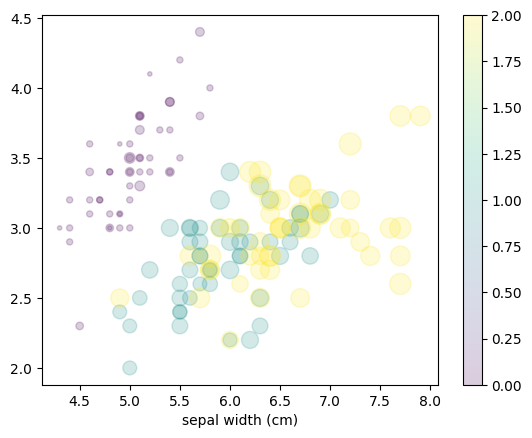

In [39]:
iris = load_iris()
features = iris.data.T
plt.scatter(features[0],features[1],alpha=0.2,s=100*features[3],c=iris.target,
           cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.xlabel(iris.feature_names[1])
plt.colorbar()

<p class='atcenter'>图 4-26：用散点属性对鸢尾花的特征进行编码</p>

散点图可以让我们同时看到不同维度的数据：每个点的坐标值 (x, y) 分
别表示花萼的长度和宽度，而点的大小表示花瓣的宽度，三种颜色对应
三种不同类型的鸢尾花。这类多颜色与多特征的散点图在探索与演示数
据时非常有用。


### 4.4.3 plot与scatter：效率对比

plt.plot 与 plt.scatter 除了特征上的差异之外，还有什么影响我们
选择的因素呢？在数据量较小的时候，两者在效率上的差异不大。但是
当数据变大到几千个散点时，plt.plot 的效率将大大高于
plt.scatter。这是由于 plt.scatter 会对每个散点进行单独的大小
与颜色的渲染，因此渲染器会消耗更多的资源。而在 plt.plot 中，散
点基本都彼此复制，因此整个数据集中所有点的颜色、尺寸只需要配置
一次。由于这两种方法在处理大型数据集时有很大的性能差异，因此面
对大型数据集时，plt.plot 方法比 plt.scatter 方法好。

# 4.5 可视化异常处理

对任何一种科学测量方法来说，准确地衡量数据误差都是无比重要的事
情，甚至比数据本身还要重要。举个例子，假如我要用一种天文学观测
手段评估哈勃常数（the Hubble Constant）——银河外星系相对地球退
行速度与距离的比值。我知道目前的公认值大约是 71(km/s) / Mpc，而
我用自己的方法测得的值是 74(km/s) / Mpc。那么，我的测量值可信
吗？如果仅知道一个数据，是不可能知道是否可信的。<br>
假如我现在知道了数据可能存在的不确定性：当前的公认值大概是
71±2.5(km/s) / Mpc，而我的测量值是 74±5(km/s) / Mpc。那么现在我的
数据与公认值一致吗？这个问题可以从定量的角度进行回答。
在数据可视化的结果中用图形将误差有效地显示出来，就可以提供更充
分的信息。


### 4.5.1 基本误差线

基本误差线（errorbar）可以通过一个 Matplotlib 函数来创建（如图 4-27
所示）：

<ErrorbarContainer object of 3 artists>

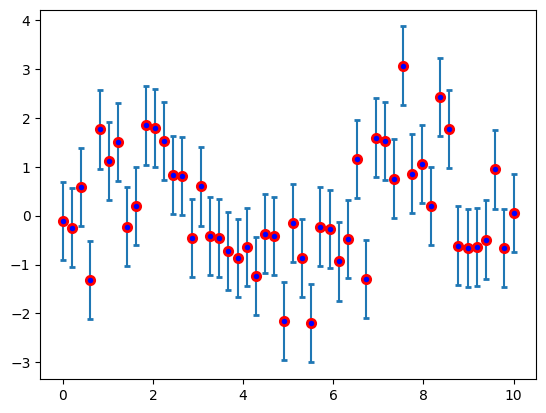

In [4]:
x=np.linspace(0,10,50)
dy = 0.8
y = np.sin(x)+dy*np.random.randn(50)
plt.errorbar(x,y,yerr=dy,fmt='o',
            markerfacecolor='blue',
             capsize=2,
            markeredgecolor='red',
            markeredgewidth=2)

<p class='atcenter'>图 4-27：误差线</p>

其中，<span class='imp'>fmt</span> 是一种控制线条和点的外观的代码格式，语法与 plt.plot
的缩写代码相同，详情请参见 4.4 节。<br>
除了基本选项之外，errorbar 还有许多改善结果的选项。通过这些额
外的选项，你可以轻松自定义误差线图形的绘画风格。我的经验是，让
误差线的颜色比数据点的颜色浅一点效果会非常好，尤其是在那些比较
密集的图形中（如图 4-28 所示）：

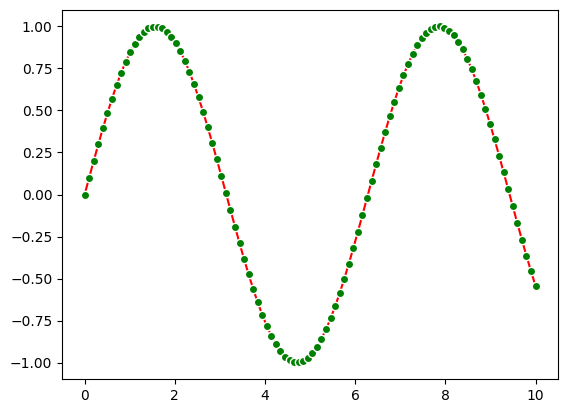

In [66]:
# 回顾之前学的知识
x=np.linspace(0,10,100)
plt.plot(x,np.sin(x),'-or',markersize=6,markerfacecolor='g',markeredgecolor='w')

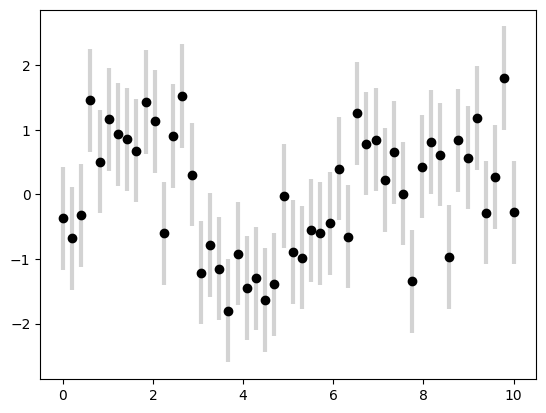

In [69]:
In[3]: plt.errorbar(x, y, yerr=dy, fmt='o', color='black',ecolor='lightgray', elinewidth=3, capsize=0);

<p class='atcenter'>图 4-28：自定义误差线</p>

In [70]:
plt.errorbar?

Signature:
plt.errorbar(
    x: 'float | ArrayLike',
    y: 'float | ArrayLike',
    yerr: 'float | ArrayLike | None' = None,
    xerr: 'float | ArrayLike | None' = None,
    fmt: 'str' = '',
    ecolor: 'ColorType | None' = None,
    elinewidth: 'float | None' = None,
    capsize: 'float | None' = None,
    barsabove: 'bool' = False,
    lolims: 'bool | ArrayLike' = False,
    uplims: 'bool | ArrayLike' = False,
    xlolims: 'bool | ArrayLike' = False,
    xuplims: 'bool | ArrayLike' = False,
    errorevery: 'int | tuple[int, int]' = 1,
    capthick: 'float | None' = None,
    *,
    data=None,
    **kwargs,
) -> 'ErrorbarContainer'
Docstring:
Plot y versus x as lines and/or markers with attached errorbars.

*x*, *y* define the data locations, *xerr*, *yerr* define the errorbar
sizes. By default, this draws the data markers/lines as well as the
errorbars. Use fmt='none' to draw errorbars without any data markers.

.. versionadded:: 3.7
   Caps and error lines are drawn in polar coordi

除了这些选项之外，你还可以设置水平方向的误差线（xerr）、单侧误
差线（one-sided errorbar），以及其他形式的误差线。关于误差线的更
多选项，请参考 plt.errorbar 的程序文档。

### 4.5.2 连续误差

有时候可能需要显示连续变量的误差。虽然 Matplotlib 没有内置的简便  
方法可以解决这个问题，但是通过 plt.plot 与 plt.fill_between 来  
解决也不是很难。<br>
我们将用 Scikit-Learn 程序库 API 里面一个简单的高斯过程回归方法  
（Gaussian process regression，GPR）来演示。这是用一种非常灵活的  
非参数方程（nonparametric function）对带有不确定性的连续测量值进  
行拟合的方法。这里不会详细介绍高斯过程回归方法的具体内容，而是  
将注意力放在数据可视化上面：  


In [80]:
from sklearn.gaussian_process import GaussianProcessRegressor

# 定义模型和要画的数据
model = lambda x: x * np.sin(x)
xdata = np.array([1, 3, 5, 6, 8])
ydata = model(xdata)

# 计算高斯过程拟合结果
gp = GaussianProcessRegressor()
gp.fit(xdata[:, np.newaxis], ydata)

xfit = np.linspace(0, 10, 1000)
yfit, dyfit_ori = gp.predict(xfit[:, np.newaxis],return_std=True)
dyfit = 2 * dyfit_ori  # 2*sigma~95%置信区间

现在，我们获得了 xfit、yfit 和 dyfit，表示数据的连续拟合结果。
接着，如上所示将这些数据传入 plt.errorbar 函数。但是我们并不是
真的要为 1000 个数据点画上 1000 条误差线；相反，可以通过在
plt.fill_between 函数中设置颜色来表示连续误差线（如图 4-29 所
示）：

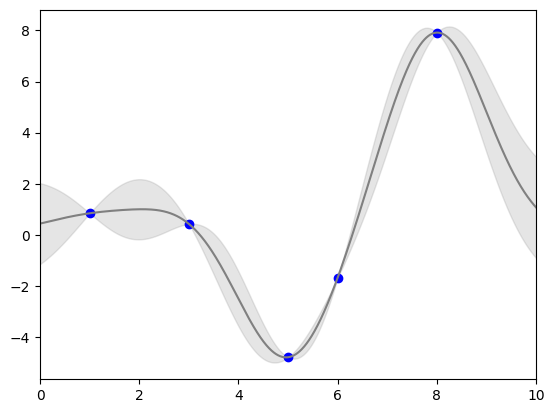

In [81]:
 # 将结果可视化
plt.plot(xdata, ydata, 'ob')
plt.plot(xfit, yfit, '-', color='gray')
plt.fill_between(xfit, yfit - dyfit, yfit + dyfit,
color='gray', alpha=0.2)
plt.xlim(0, 10);

<p class='atcenter'>图 4-29：通过区域填充表示连续误差</p>

请注意，我们将 fill_between 函数设置为：首先传入 x 轴坐标值，然  
后传入 y 轴下边界以及 y 轴上边界，这样整个区域就被误差线填充了。  
从结果图形中可以非常直观地看出高斯过程回归方法拟合的效果：在接  
近样本点的区域，模型受到很强的约束，拟合误差非常小，非常接近真  
实值；而在远离样本点的区域，模型不受约束，误差不断增大。  
若想获取更多关于 plt.fill_between() 函数（以及它与 plt.fill()  
的紧密关系）选项的信息，请参考函数文档或者 Matplotlib 文档。  
最后提一点，如果你觉得这样实现连续误差线的做法太原始，可以参考  
4.16 节，我们会在那里介绍 Seaborn 程序包，它提供了一个更加简便的  
API 来实现连续误差线。  